$\DeclareMathOperator{\d}{d}$
$\newcommand{\err}[3]{\Delta #1 =& #1\cdot\sqrt{\lr{\frac{\Delta #2}{#2}}^2 + \lr{\frac{\Delta #3}{#3}}^2}}$
$\newcommand{\lr}[1]{\left(#1\right)}$
$\newcommand{\t}[1]{\text{#1}}$

# Protokoll PAP2 Versuch 255: Röntgenspektrometer
Leonard Scheuer

## Motivation
Dieser Versuch soll in die Röntgenspektroskopie einführen. Dazu werden 

## Grundlagen
### Röntgenröhre
Eine Röntgenröhre ist eine Evakuierte Röhre, in welcher Glühelektronen gegen eine (hier Molybdän) Anode beschleunigt werden. (Siehe auch Abbildung 1)

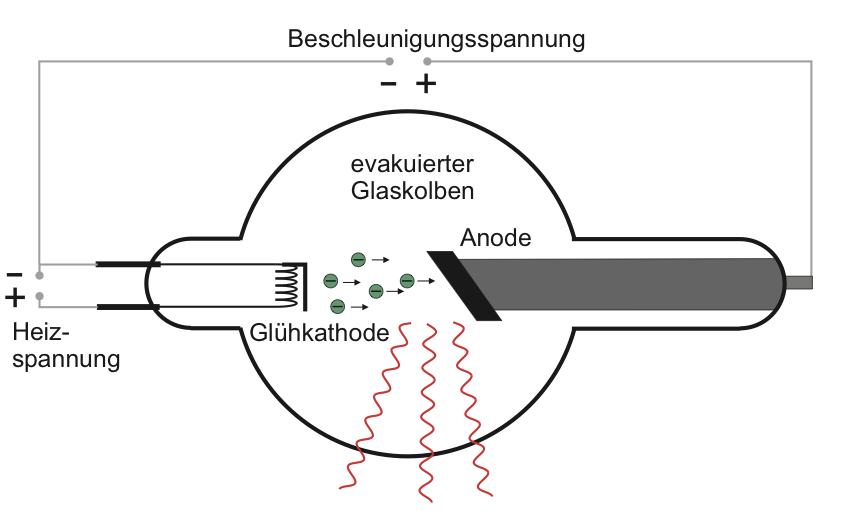
Abb. 1: Röntgenröhre (Quelle: Script)

Treffen die Elektronen auf die Anode geben sie sowohl ein kontinuierliches Bremsstrahlungsspektrum ab, stoßen aber auch mit Elektronen der Atome, wird ein solches in einer der unteren Schalen ionisiert rückt ein höherenergetisches unter Abgabe eines Photons nach, diese Energielinien sind als die Spitzen im Spektrum sichbar. (Siehe auch Abb. 2 und 3) Für sie gilt das Mosley'sche Gesetz für den Schalenübergang von n zu m näherungsweise:
\begin{align}
	E = hcR_\infty (Z-A)^2(\frac 1{m^2} - \frac 1{n^2})
\end{align}
Dabei ist $Z$ die Kernladungszahl und $R_\infty$ die Rydbergkonstante. $A$ nennt man Abschirmungskonstante. Für den $K_\alpha$-Übergang gilt etwa A=1:
\begin{align}
	E = \frac{3}{4} hcR_\infty (Z-1)^2
\end{align}

Die Bremsstrahlung setzt wegen Energierehaltung (maximale Beschleunigungsenergie) erst bei einer Wellenlänge
\begin{align}
	\lambda_g = \frac{hc}{eU} \label{eq:h}
\end{align}
ein, wobei $U$ die Beschleunigungsspannung ist. 

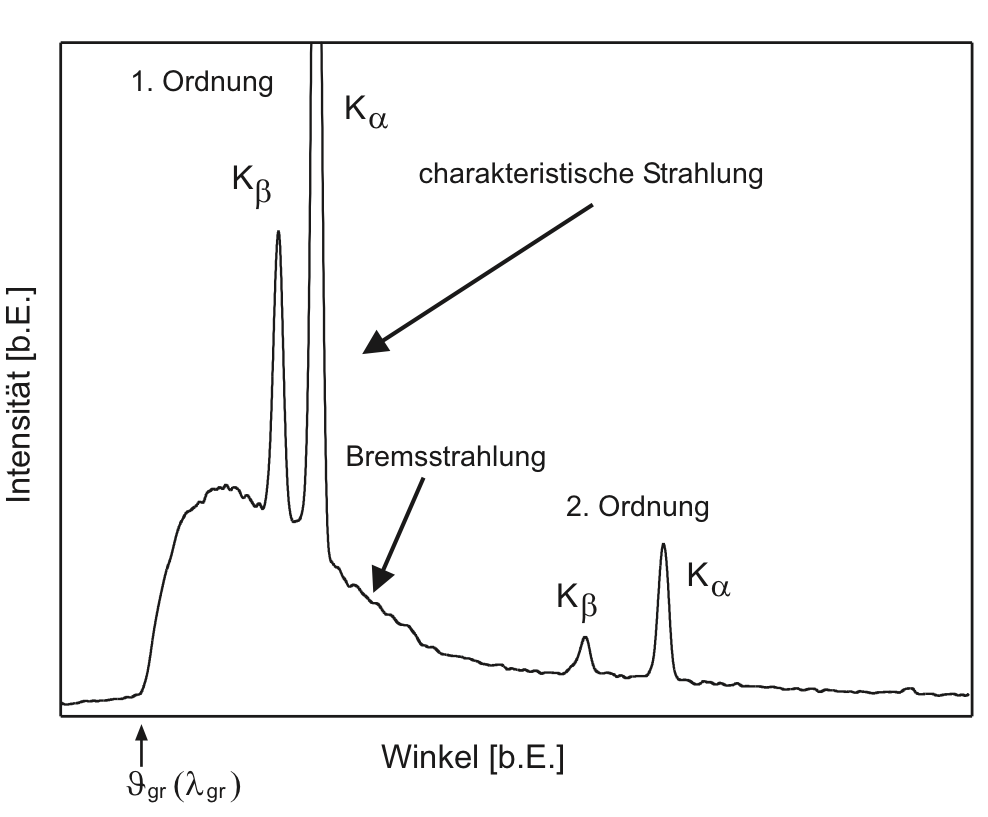
Abb. 2: Röntgenspektrum (Quelle:Script)

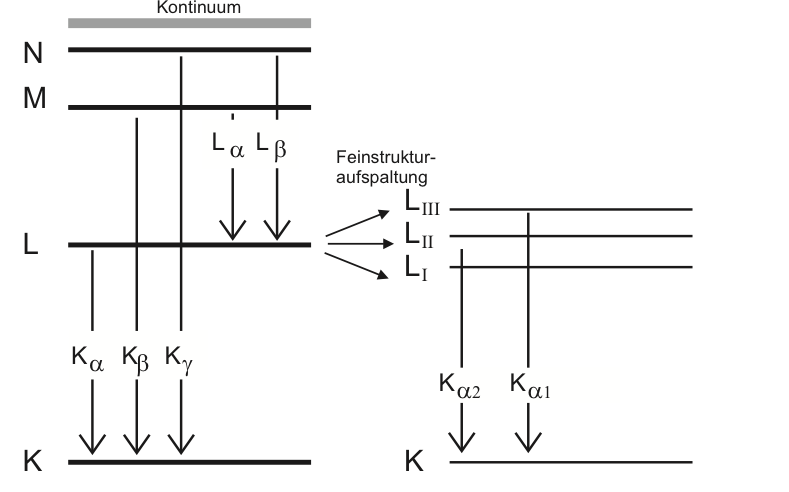
Abb. 3: Energieniveaus vom Molybdän

### Bragg-Reflexion

Das Bragg-Gesetz besagt mit dem Netzebenenabstand $d$ und Winkeln wie in Abb. 4:
\begin{align}
	n \lambda = 2d \sin(\vartheta)\label{eq:b}
\end{align}

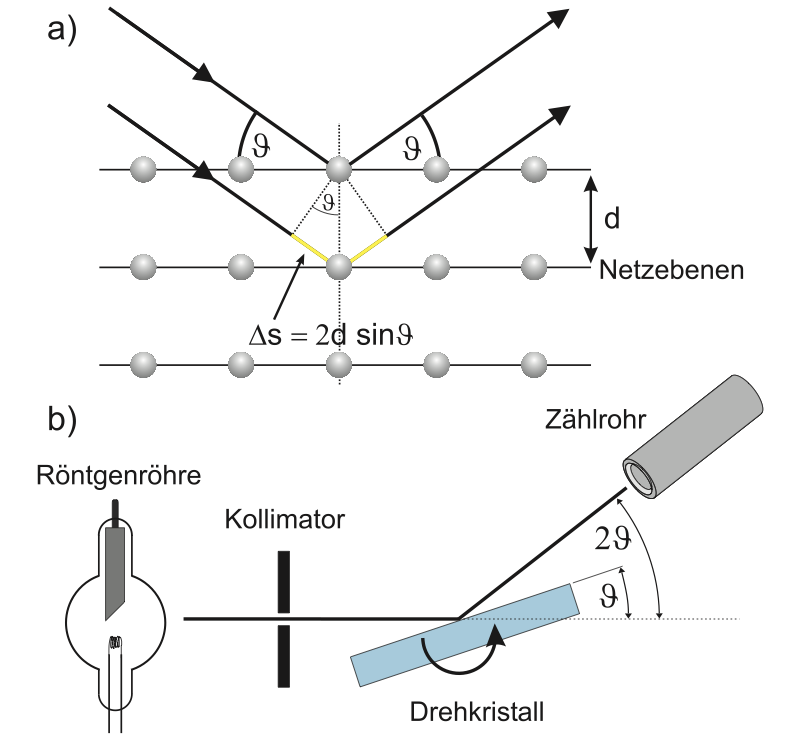
Abb. 4: Bragg-Reflexion

Wir können also die Bragg-Bedingung nutzen um wellelängenabhängig zu messen. Umgekehrt können wir bei bekannter Wellenlänge so $d$ bestimmen und bei bekannter Stoffzusammensetzung so die Avogadrozahl bestimmen:
\begin{align}
	N_A = 4 \cdot  \frac{V_\t{mol}}{V} = 4 \cdot  \frac{V_\t{mol}}{(2d)^3} = \frac 12 \frac{M_\t{Mol}}{\rho d^3} \label{eq:NA}
\end{align}
Wobei $\rho$ die Dichte und $M_\t{mol}$ die molare Masse des  Kristalls ist. 

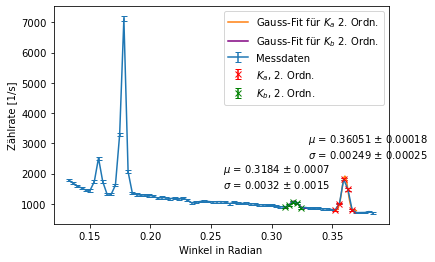

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))

def gauss(x, mu, sig, A, y0):
    return A * np.exp(-(x - mu)**2 / 2 / sig**2) + y0

n0, theta0 = np.loadtxt('v0.txt', converters = {1:comma_to_float, 5:comma_to_float}, unpack = True, usecols = (1, 5))

theta0 *= np.pi / 180

plt.errorbar(theta0[theta0 > 7.5 * np.pi / 180], n0[theta0 > 7.5 * np.pi / 180], yerr = np.sqrt(n0[theta0 > 7.5 * np.pi / 180]), capsize = 3, label = 'Messdaten')
plt.errorbar(theta0[-10:-5], n0[-10:-5], yerr = np.sqrt(n0[-10:-5]), capsize = 3, fmt = 'rx', label = '$K_{a}}$, 2. Ordn.')
plt.errorbar(theta0[-22:-17], n0[-22:-17], yerr = np.sqrt(n0[-22:-17]), capsize = 3, fmt = 'gx', label = '$K_{b}}$, 2. Ordn.')

popt_a2, pcov_a2 = curve_fit(gauss, theta0[-10:-5], n0[-10:-5], sigma = np.sqrt(n0[-10:-5]), p0 = (0.357, 0.002, 2000, 1000))

x = np.linspace(theta0[-10], theta0[-5])
plt.plot(x, gauss(x, *popt_a2), label = 'Gauss-Fit für $K_a$ 2. Ordn.')
plt.text(0.33, 2500, '$\mu$ = {0:.5f} ± {1:.5f}\n$\sigma$ = {2:.5f} ± {3:.5f}'.format(popt_a2[0], np.sqrt(pcov_a2[0][0]), popt_a2[1], np.sqrt(pcov_a2[1][1])))

popt_b2, pcov_b2 = curve_fit(gauss, theta0[-22:-17], n0[-22:-17], sigma = np.sqrt(n0[-22:-17]), p0 = (0.32, 0.002, 1100, 1000))

x = np.linspace(theta0[-22], theta0[-17])
plt.plot(x, gauss(x, *popt_b2), label = 'Gauss-Fit für $K_b$ 2. Ordn.', color = 'purple')
plt.text(0.26, 1500, '$\mu$ = {0:.4f} ± {1:.4f}\n$\sigma$ = {2:.4f} ± {3:.4f}'.format(popt_b2[0], np.sqrt(pcov_b2[0][0]), popt_b2[1], np.sqrt(pcov_b2[1][1])))

plt.xlabel('Winkel in Radian')
plt.ylabel('Zählrate [1/s]')
plt.legend()

plt.savefig('255-5.jpeg')

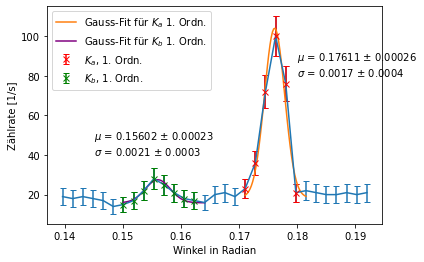

In [2]:
theta1, n1 = np.loadtxt('v1.txt', converters = {0:comma_to_float, 1:comma_to_float}, unpack = True)

theta1 *= np.pi / 180 #In Radian

plt.errorbar(theta1, n1, yerr = np.sqrt(n1), capsize = 3)
plt.errorbar(theta1[18:24], n1[18:24], yerr = np.sqrt(n1[18:24]), capsize = 3, fmt = 'rx', label = '$K_{a}}$, 1. Ordn.')
plt.errorbar(theta1[6:14], n1[6:14], yerr = np.sqrt(n1[6:14]), capsize = 3, fmt = 'gx', label = '$K_{b}}$, 1. Ordn.')

popt_a1, pcov_a1 = curve_fit(gauss, theta1[18:24], n1[18:24], sigma = np.sqrt(n1[18:24]), p0 = (0.175, 0.002, 100, 20))

x = np.linspace(theta1[18], theta1[24])
plt.plot(x, gauss(x, *popt_a1), label = 'Gauss-Fit für $K_a$ 1. Ordn.')
plt.text(0.18, 80, '$\mu$ = {0:.5f} ± {1:.5f}\n$\sigma$ = {2:.4f} ± {3:.4f}'.format(popt_a1[0], np.sqrt(pcov_a1[0][0]), popt_a1[1], np.sqrt(pcov_a1[1][1])))

popt_b1, pcov_b1 = curve_fit(gauss, theta1[6:14], n1[6:14], sigma = np.sqrt(n1[6:14]), p0 = (0.155, 0.003, 40, 15))

x = np.linspace(theta1[6], theta1[14])
plt.plot(x, gauss(x, *popt_b1), label = 'Gauss-Fit für $K_b$ 1. Ordn.', color = 'purple')
plt.text(0.145, 40, '$\mu$ = {0:.5f} ± {1:.5f}\n$\sigma$ = {2:.4f} ± {3:.4f}'.format(popt_b1[0], np.sqrt(pcov_b1[0][0]), popt_b1[1], np.sqrt(pcov_b1[1][1])))

plt.xlabel('Winkel in Radian')
plt.ylabel('Zählrate [1/s]')
plt.legend()

plt.savefig('255-4.jpeg')

In [3]:
d = 201.4e-12
lam_a_lit = 71.1e-12
lam_b_lit = 63.1e-12

lam_a1 = 2 * d * np.sin(popt_a1[0])
lam_a1_err = lam_a1 * popt_a1[1] / np.tan(popt_a1[0])

print('lam_a1 = ({0:.1f} ± {1:.1f})pm'.format(lam_a1 * 10**12, lam_a1_err * 10**12))
print('Abweichung zum Literaturwert: {0:.2f} sigma'.format(np.abs(lam_a_lit - lam_a1)/lam_a1_err))

lam_a2 = d * np.sin(popt_a2[0])
lam_a2_err = lam_a2 * popt_a2[1] / np.tan(popt_a2[0])

print('lam_a2 = ({0:.1f} ± {1:.1f})pm'.format(lam_a2 * 10**12, lam_a2_err * 10**12))
print('Abweichung zum Literaturwert: {0:.2f} sigma'.format(np.abs(lam_a_lit - lam_a2)/lam_a2_err))

lam_b1 = 2 * d * np.sin(popt_b1[0])
lam_b1_err = lam_a1 * popt_b1[1] / np.tan(popt_b1[0])

print('lam_b1 = ({0:.1f} ± {1:.1f})pm'.format(lam_b1 * 10**12, lam_b1_err * 10**12))
print('Abweichung zum Literaturwert: {0:.2f} sigma'.format(np.abs(lam_b_lit - lam_b1)/lam_b1_err))

lam_b2 = d * np.sin(popt_b2[0])
lam_b2_err = lam_a2 * popt_b2[1] / np.tan(popt_b2[0])

print('lam_b2 = ({0:.1f} ± {1:.1f})pm'.format(lam_b2 * 10**12, lam_b2_err * 10**12))
print('Abweichung zum Literaturwert: {0:.2f} sigma'.format(np.abs(lam_b_lit - lam_b2)/lam_b2_err))

lam_a1 = (70.6 ± 0.7)pm
Abweichung zum Literaturwert: 0.77 sigma
lam_a2 = (71.0 ± 0.5)pm
Abweichung zum Literaturwert: 0.12 sigma
lam_b1 = (62.6 ± 1.0)pm
Abweichung zum Literaturwert: 0.53 sigma
lam_b2 = (63.1 ± 0.7)pm
Abweichung zum Literaturwert: 0.06 sigma


In [4]:
print('FWHM: {0:.4f} ± {1:.4f}'.format(2.4 * popt_a1[0], 2.4 * np.sqrt(pcov_a1[0][0])))

FWHM: 0.4227 ± 0.0006


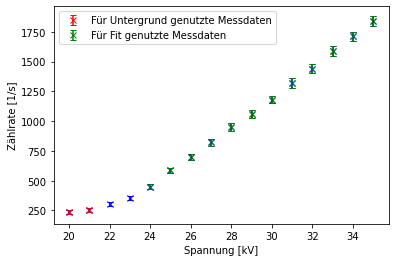

In [5]:
U, n, n_err = np.genfromtxt("v2.csv", delimiter = ';', skip_header = 1, unpack = True)

plt.errorbar(U, n, yerr = n_err, fmt = 'bx', capsize = 3)
plt.errorbar(U[:2], n[:2], yerr = n_err[:2], fmt = 'rx', capsize = 3, label = 'Für Untergrund genutzte Messdaten')
plt.errorbar(U[4:], n[4:], yerr = n_err[4:], fmt = 'gx', capsize = 3, label = 'Für Fit genutzte Messdaten')
plt.legend()
plt.xlabel('Spannung [kV]')
plt.ylabel('Zählrate [1/s]')

plt.savefig('255-6.jpeg')

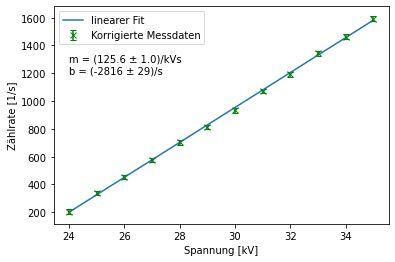

In [6]:
def fit_line(x, m, b):
    return m * x + b

n_UG = np.mean(n[:2])

n_fit = n[4:] - n_UG
n_fit_err = np.sqrt(n_err[4:] + n_UG)

plt.errorbar(U[4:], n_fit, yerr = n_fit_err, fmt = 'gx', capsize = 3, label = 'Korrigierte Messdaten')
popt_U, pcov_U = curve_fit(fit_line, U[4:], n_fit, sigma = n_fit_err)

plt.plot(U[4:], fit_line(U[4:], *popt_U), label = 'linearer Fit')

plt.legend()
plt.xlabel('Spannung [kV]')
plt.ylabel('Zählrate [1/s]')

plt.text(24, 1200, 'm = ({0:.1f} ± {1:.1f})/kVs\nb = ({2:.0f} ± {3:.0f})/s'.format(popt_U[0], np.sqrt(pcov_U[0][0]), popt_U[1], np.sqrt(pcov_U[1][1])))

plt.savefig('255-7.jpeg')

In [7]:
U_G = - popt_U[1] / popt_U[0]
U_G_err = U_G * np.sqrt(pcov_U[0][0] / popt_U[0]**2 + pcov_U[1][1] / popt_U[1]**2)

print('Grenzspannung: ({0:.2f} ± {1:.2f})kV'.format(U_G, U_G_err))

Grenzspannung: (22.41 ± 0.29)kV


In [8]:
e = 1.602176634e-19
c = 299792458
theta = 7.5 * np.pi / 180

h = 2 * d * e * U_G * 10**3 * np.sin(theta) / c #kV to V
h_err = h * U_G_err / U_G

print('h = ({0:.2f} ± {1:.2f})e-34Js'.format(h * 10**34, h_err * 10**34))

h = (6.30 ± 0.08)e-34Js


In [9]:
h_lit = 6.62607015e-34

print('Abweichung h: {0} sigma'.format(np.abs(h - h_lit) / h_err))

Abweichung h: 4.074857342166682 sigma


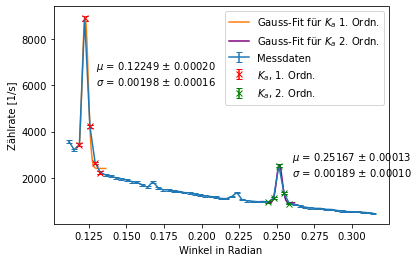

In [10]:
theta2, n2 = np.loadtxt('v3.txt', converters = {0:comma_to_float, 1:comma_to_float}, unpack = True)

theta2 *= np.pi / 180

plt.errorbar(theta2[theta2 > 0.11], n2[theta2 > 0.11], yerr = np.sqrt(n2[theta2 > 0.11]), capsize = 3, label = 'Messdaten')
plt.errorbar(theta2[19:24], n2[19:24], yerr = np.sqrt(n2[19:24]), capsize = 3, fmt = 'rx', label = '$K_{a}}$, 1. Ordn.')
plt.errorbar(theta2[-21:-16], n2[-21:-16], yerr = np.sqrt(n2[-21:-16]), capsize = 3, fmt = 'gx', label = '$K_{a}}$, 2. Ordn.')

popt_a1_2, pcov_a1_2 = curve_fit(gauss, theta2[19:24], n2[19:24], sigma = np.sqrt(n2[19:24]), p0 = (0.11, 0.005, 8200, 2000))

x = np.linspace(theta2[19], theta2[24])
plt.plot(x, gauss(x, *popt_a1_2), label = 'Gauss-Fit für $K_a$ 1. Ordn.')
plt.text(0.13, 6000, '$\mu$ = {0:.5f} ± {1:.5f}\n$\sigma$ = {2:.5f} ± {3:.5f}'.format(popt_a1_2[0], np.sqrt(pcov_a1_2[0][0]), popt_a1_2[1], np.sqrt(pcov_a1_2[1][1])))

popt_a2_2, pcov_a2_2 = curve_fit(gauss, theta2[-21:-16], n2[-21:-16], sigma = np.sqrt(n2[-21:-16]), p0 = (0.25, 0.005, 3000, 1000))

x = np.linspace(theta2[-21], theta2[-16])
plt.plot(x, gauss(x, *popt_a2_2), label = 'Gauss-Fit für $K_a$ 2. Ordn.', color = 'purple')
plt.text(0.26, 2100, '$\mu$ = {0:.5f} ± {1:.5f}\n$\sigma$ = {2:.5f} ± {3:.5f}'.format(popt_a2_2[0], np.sqrt(pcov_a2_2[0][0]), popt_a2_2[1], np.sqrt(pcov_a2_2[1][1])))

plt.xlabel('Winkel in Radian')
plt.ylabel('Zählrate [1/s]')
plt.legend()

plt.savefig('255-8.jpeg')

In [11]:
lam_a = np.mean([lam_a1, lam_a2])
lam_a_err = 0.5 * np.sqrt(np.sum(np.array([lam_a1_err, lam_a2_err])**2))

d1 = lam_a / (2 * np.sin(popt_a1_2[0]))
d1_err = d1 * np.sqrt((lam_a_err / lam_a)**2 + (popt_a1_2[1] / np.tan(popt_a1_2[0]))**2)

print('K_a, 1. Ordn.: d = ({0:.0f} ± {1:.0f})pm'.format(d1 * 10**12, d1_err * 10**12))

d2 = lam_a / (np.sin(popt_a2_2[0]))
d2_err = d1 * np.sqrt((lam_a_err / lam_a)**2 + (popt_a2_2[1] / np.tan(popt_a2_2[0]))**2)

print('K_a, 2. Ordn.: d = ({0:.1f} ± {1:.1f})pm'.format(d2 * 10**12, d2_err * 10**12))

print('Abweichung der Ergebnisse: {0:.2f} sigma'.format(np.abs(d1 - d2) / np.sqrt(d1_err**2 + d2_err**2)))

d = np.mean([d1, d2])
d_err = 0.5 * np.sqrt(np.sum(np.array([d1_err, d2_err])**2))

print('Mittelwert: d = ({0:.1f} ± {1:.1f})pm'.format(d * 10**12, d_err * 10**12))

K_a, 1. Ordn.: d = (290 ± 5)pm
K_a, 2. Ordn.: d = (284.3 ± 2.7)pm
Abweichung der Ergebnisse: 0.95 sigma
Mittelwert: d = (287.0 ± 2.8)pm


In [12]:
rho = 2.164 * 10**3 #SI
M = 58.44 * 10**(-3)

N_A = 0.5 * M / (rho * d**3)
N_A_err = 3 * N_A * d_err / d

print('N_A = ({0:.2f} ± {1:.2f})e23/mol'.format(N_A * 10**(-23), N_A_err * 10**(-23)))

N_A_lit = 6.02214076e23

print('Abweichung N_A: {0:.2f} sigma'.format(np.abs(N_A_lit - N_A) / N_A_err))

N_A = (5.71 ± 0.17)e23/mol
Abweichung N_A: 1.85 sigma
